# Generate routes

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
data_stops = pd.read_csv('data/uni_molde_v3.csv', sep=';')

data_stops.loc[data_stops['stop_completed_at'].isna(), 'stop_completed_at'] = "-1"
data_stops.loc[data_stops['stop_arrived_at'].isna(), 'stop_arrived_at'] = "-1"

sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops['day_of_week'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.day_name()
sorted_data_stops['date'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.date

#clustering
locations_df = sorted_data_stops[['current_lat', 'current_lng']]
kmeans = KMeans(n_clusters=5000, random_state=42)
kmeans.fit(locations_df)
sorted_data_stops['cluster'] = kmeans.labels_ + 1

sorted_data_stops['location_id_craft'] = sorted_data_stops.groupby(['current_lat', 'current_lng']).ngroup()+1
with open('output.txt', 'w') as f:
    print(sorted_data_stops.to_string(), file=f)
print('number of groups', sorted_data_stops['location_id_craft'].nunique())

grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'address_id', 'stop_dispatched_at', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'stop_completed_at', 'cluster', 'location_id_craft','day_of_week', 'date', 'location_is_depot']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'planned_route_location': x['address_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
    'current_lat': x['current_lat'].tolist(),
    'current_lng': x['current_lng'].tolist(),
    'stop_completed_at': x['stop_completed_at'].tolist(),
    'planned_route_cluster': x['cluster'].tolist(),
    'planned_route_craft': x['location_id_craft'].tolist(),
    'day_of_week': x['day_of_week'].tolist(),
    'location_is_depot': x['location_is_depot'].tolist(),
    'date': x['date'].tolist()
})).reset_index()
grouped_df
# grouped_df

number of groups 11589


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[3165, 1419, 3238, 3429, 720, 1360, 4511, 3703...","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[3165, 122, 3540, 1413, 3487, 2070, 1287]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[3165, 1073, 1995, 3776, 1059, 1266, 1938, 193...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[3165, 442, 137, 137, 137, 137, 137, 137, 1809...","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 12.615835, 12.576841, 12.6515491,...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[3165, 3301, 537, 1830, 4879, 3305, 3305, 1642...","[1169, 965, 818, 1070, 1658, 1168, 1166, 888, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, Fa

In [5]:
from geopy.distance import geodesic

# Calculate distances between customers
def calculate_distance(row):
    distances = []
    for i in range(len(row['planned_route_craft'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

def calculate_distance_actual(row):
    distances = []
    for i in range(len(row['actual_route_location'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)
grouped_df['total_distance_planned'] = grouped_df['distance_route'].apply(sum)
grouped_df

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,distance_route,total_distance_planned
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[3165, 1419, 3238, 3429, 720, 1360, 4511, 3703...","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.694940475474436, 1.7084597707961175, 0.185...",19.039848
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[3165, 122, 3540, 1413, 3487, 2070, 1287]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.223311758249285, 0.11025550750368773, 1.374...",12.124804
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[3165, 1073, 1995, 3776, 1059, 1266, 1938, 193...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[5.182600931419761, 1.3171408361998556, 0.5029...",56.772919
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[3165, 442, 137, 137, 137, 137, 137, 137, 1809...","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.41095073521456, 2.0081266994719744, 0.0, 0...",79.685240
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...

In [10]:
# Remove routes where dispatching after the route has been started
routes = grouped_df[grouped_df.apply(lambda row: max(row['stop_dispatched_at']) < min(row['stop_completed_at']), axis=1)]
routes = routes.reset_index(drop=True)
len(routes)

20692

In [11]:
# Remove routes with NA values (was encoded as -1)
index_routes_with_na = []
for i in range(len(routes)):
    row = routes.iloc[i]
    if "-1" in row['stop_arrived_at']:
        index_routes_with_na.append(i)
print("The number of routes where one value is NA(arrived time)", len(index_routes_with_na))
print(index_routes_with_na)
routes = routes.drop(index_routes_with_na)
routes.reset_index(drop=True)
#
print(len(routes))

The number of routes where one value is NA(arrived time) 23
[1187, 1464, 1688, 1746, 2113, 3424, 3880, 4471, 4974, 5098, 5172, 5182, 5540, 5787, 6476, 7626, 10793, 11161, 11621, 13845, 17739, 19786, 20033]
20669


In [12]:
def get_mode(x):
    return pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan

# Test (check that driver_ids are the same in one route)
for i in routes['driver_id']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')

# Transformation of the columns
routes['driver_id'] = routes['driver_id'].apply(lambda x : x[0])

routes['day_of_week'] = routes['day_of_week'].apply(get_mode)
routes['date'] = routes['date'].apply(get_mode)

routes['date'] = pd.to_datetime(routes['date'])
routes['last_two_weeks_count'] = routes.apply(lambda row:
                                      routes[(routes['driver_id'] == row['driver_id']) &
                                         (row['date'] - routes['date']).dt.days.between(-14, 0)].shape[0],
                                      axis=1)
routes = routes[(routes['date'] < '2023-12-21') | (routes['date'] > '2024-01-14')]
routes['location_type_id'] = routes['location_type_id'].apply(lambda x: [0 if i == 1 else 1 for i in x])
routes['location_is_depot'] = routes['location_is_depot'].apply(lambda x: [int(value) for value in x])

routes = routes[routes['planned_route_craft'].apply(lambda x: len(x) > 2)]
routes = routes.reset_index(drop=True)

In [13]:
routes

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,distance_route,total_distance_planned,last_two_weeks_count
0,305735,1255,"[0, 1, 1, 1, 1, 1, 1, 1]","[153184, 118973, 118820, 119089, 118814, 11909...","[2024-01-15 20:13:10.25734+00, 2024-01-15 20:1...","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...","[2024-01-15 22:14:55.135437+00, 2024-01-15 23:...","[147, 1419, 3429, 3703, 1360, 1360, 4511, 335]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",Monday,"[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,"[14.640018023192697, 1.5229312527257717, 0.606...",18.615111,8
1,305741,1195,"[0, 1, 1, 1, 1, 1, 1, 1]","[153184, 120295, 133280, 120297, 118930, 11893...","[2024-01-15 20:14:10.430711+00, 2024-01-15 20:...","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...","[2024-01-15 22:59:10.867219+00, 2024-01-15 23:...","[147, 122, 2070, 3540, 1413, 1413, 3663, 1287]","[1167, 1352, 1312, 1356, 1508, 1508, 1621, 1401]",Monday,"[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,"[8.16888775040224, 0.4067943329231743, 0.35828...",12.682013,11
2,305742,1186,"[0, 1, 1, 1, 1, 1, 1]","[153184, 118945, 119107, 119964, 126319, 12031...","[2024-01-15 20:15:12.147596+00, 2024-01-15 20:...","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.7498333, 55.80148, 55.7...","[12.15372974969827, 12.5870785, 12.525814, 12....","[2024-01-15 22:32:54.670991+00, 2024-01-15 23:...","[147, 2596, 521, 4623, 3326, 3115, 1050]","[1167, 2231, 2406, 2349, 2298, 2588, 2493]",Monday,"[1, 0, 0, 0, 0, 0, 0]",2024-01-15,"[18.380690356980487, 4.298068156860068, 1.5617...",34.403233,9
3,305754,1218,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[153184, 118858, 119855, 118805, 119069, 11879...","[2024-01-15 20:17:12.871538+00, 2024-01-15 20:...","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.646535, 55.672309, 55.6...","[12.15372974969827, 12.539958, 12.588959, 12.6...","[2024-01-15 22:37:19.03627+00, 2024-01-16 00:2...","[147, 3305, 3715, 4879, 1830, 537, 3301, 2199,...","[1167, 1168, 1495, 1658, 1070, 818, 965, 936, ...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,"[15.110089331615377, 2.617611669361755, 0.8878...",53.800967,11
4,305758,1192,"[0, 1, 1, 1, 1, 1, 1, 1, 1]","[153184, 118509, 144815, 119179, 118785, 11928...","[2024-01-15 20:17:36.851051+00, 2024-01-15 20:...","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.640375, 55.639120600000...","[12.15372974969827, 12.091312, 12.0627714, 12....","[2024-01-15 23:06:46.892607+00, 2024-01-16 01:...","[147, 4979, 3980, 3679, 2681, 2319, 708, 1644,...","[1167, 1101, 1079, 1282, 1123, 1098, 834, 1262...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,"[2.4776512575967895, 1.1201296974431052, 1.598...",18.376147,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,442390,276,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[23977, 46865, 149896, 24638, 42874, 136813, 3...","[2024-08-06 19:39:14.014177+00, 2024-08-06 19:...","[2024-08-07 13:31:52.955936+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...

In [14]:
# Actual route preprocessing

def create_actual_route(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row[column][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

def create_actual_route_type(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row['location_type_id'][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

routes['actual_route_location'] = create_actual_route(routes, 'planned_route_craft')
routes['actual_route_type'] = create_actual_route_type(routes, 'planned_route_craft')
routes['distance_actual_route'] = routes.apply(calculate_distance_actual, axis=1)
routes['total_distance_actual'] = routes['distance_actual_route'].apply(sum)
routes['difference_distance'] = (routes['total_distance_actual'] - routes['total_distance_planned'])/routes['total_distance_planned']

# Remove all the routes with length <= 2
routes = routes[routes['planned_route_craft'].apply(lambda x: len(x) > 2)]
routes = routes.reset_index(drop=True)

len(routes)

18562

In [15]:
# Check the number of depot vidits in the routes
routes = routes.reset_index(drop=True)
more_than_one_1 = routes[routes['location_is_depot'].apply(lambda x: x.count(True) > 1)]
len(more_than_one_1), len(routes)

(6322, 18562)

In [16]:
#Select necessary columns
planned_routes = routes[['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'difference_distance', 'distance_route', 'location_is_depot', 'location_type_id', 'date']]
actual_routes = routes['actual_route_location']

In [17]:
planned_routes

,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,difference_distance,distance_route,location_is_depot,location_type_id,date
0,"[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255,Monday,8,"[0, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",0.000000,"[14.640018023192697, 1.5229312527257717, 0.606...","[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]",2024-01-15
1,"[1167, 1352, 1312, 1356, 1508, 1508, 1621, 1401]","[1167, 1312, 1356, 1352, 1508, 1508, 1621, 1401]",1195,Monday,11,"[0, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...",0.006369,"[8.16888775040224, 0.4067943329231743, 0.35828...","[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]",2024-01-15
2,"[1167, 2231, 2406, 2349, 2298, 2588, 2493]","[1167, 2231, 2349, 2406, 2298, 2493, 2588]",1186,Monday,9,"[0, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.7498333, 55.80148, 55.7...","[12.15372974969827, 12.5870785, 12.525814, 12....",-0.027603,"[18.380690356980487, 4.298068156860068, 1.5617...","[1, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1]",2024-01-15
3,"[1167, 1168, 1495, 1658, 1070, 818, 965, 936, ...","[1167, 1070, 936, 822, 963, 965, 818, 1658, 14...",1218,Monday,11,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.646535, 55.672309, 55.6...","[12.15372974969827, 12.539958, 12.588959, 12.6...",0.435438,"[15.110089331615377, 2.617611669361755, 0.8878...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2024-01-15
4,"[1167, 1101, 1079, 1282, 1123, 1098, 834, 1262...","[1167, 1098, 1315, 1282, 1262, 834, 1123, 1079...",1192,Monday,11,"[0, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.640375, 55.639120600000...","[12.15372974969827, 12.091312, 12.0627714, 12....",0.162129,"[2.4776512575967895, 1.1201296974431052, 1.598...","[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]",2024-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,"[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...","[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...",276,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:52.955936+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 60.01175632293701, 59.950832, 59.9...","[11.047135, 11.052440556594831, 10.856852, 10....",0.000000,"[0.3399120416382811, 7.9893719361707864, 1.229...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2024-08-06
18558,"[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",968,Tuesday,2,"[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]","[2024-08-07 03:50:55.931321+00, 2024-08-07 05:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","[59.805664, 59.749221, 59.747942, 59.737167777...","[10.290383, 10.26819, 10.291249, 10.37259042

In [18]:
# Change type to list for future processing
planned_routes_list = planned_routes['planned_route_craft'].tolist()
actual_routes_list = actual_routes.tolist()
len(planned_routes_list),len(actual_routes_list)

(18562, 18562)

## Metrics calculation

In [175]:
# Edit distance
def minDistance(len1, len2) -> int:
    m = len(len1)
    n = len(len2)
    # dp[i][j] := min # Of operations to convert word1[0..i) to word2[0..j)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
      dp[i][0] = i

    for j in range(1, n + 1):
      dp[0][j] = j

    for i in range(1, m + 1):
      for j in range(1, n + 1):
        if len1[i - 1] == len2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1]
        else:
          dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]



print('example', minDistance([354, 379, 403, 1789, 464, 381, 1113, 382], [354, 403, 379, 1789, 464, 381, 382, 1113]))

example 4


In [21]:
# Route quality Score
def calculate_route_quality_score(planned_ranks, actual_ranks):
    sum_of_differences = sum(abs(actual_ranks.index(x) - planned_ranks.index(x)) for x in planned_ranks)
    max_possible_difference = sum([abs(2 * i - (len(planned_ranks) + 1)) for i in range(1, len(planned_ranks) + 1)])
    route_quality_score = 1 - (sum_of_differences / max_possible_difference)
    return route_quality_score

In [125]:
completed_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'location_type_id', 'location_is_depot', 'date', 'score', 'difference_distance'])
uncompleted_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'location_type_id', 'location_is_depot', 'date', 'score', 'difference_distance'])

scores = []
edit_distances = []
completed_routes_list = []
uncompleted_routes_list = []

# Classify based on metrics thresholds

for i in range(len(planned_routes_list)):
    editDistance = minDistance(planned_routes_list[i], actual_routes_list[i]) / len(planned_routes_list[i])
    score = calculate_route_quality_score(planned_routes_list[i], actual_routes_list[i])
    scores.append(score)
    edit_distances.append(editDistance)

    # if editDistance > 0.05 and score < 0.95 and planned_routes['difference_distance'].iloc[i] > 0.01:
    if editDistance <= 0.3 and score >= 0.7 and planned_routes['difference_distance'].iloc[i] <= 0.3:
    # if editDistance <= 0 and score >= 1 and planned_routes['difference_distance'].iloc[i] <= 0:
        completed_routes_list.append({**planned_routes.iloc[i].to_dict(), 'score': score})

    else:
        uncompleted_routes_list.append({**planned_routes.iloc[i].to_dict(), 'score': score})

# Convert the lists to DataFrames
completed_routes_df = pd.DataFrame(completed_routes_list)
uncompleted_routes_df = pd.DataFrame(uncompleted_routes_list)
print(len(completed_routes_df), len(uncompleted_routes_df))
completed_routes_df

8612 9950


,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,difference_distance,distance_route,location_is_depot,date,score
0,"[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255,Monday,8,"[0, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",0.000000,"[14.640018023192697, 1.5229312527257717, 0.606...","[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,1.00000
1,"[1167, 1352, 1312, 1356, 1508, 1508, 1621, 1401]","[1167, 1312, 1356, 1352, 1508, 1508, 1621, 1401]",1195,Monday,11,"[0, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...",0.006369,"[8.16888775040224, 0.4067943329231743, 0.35828...","[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,0.87500
2,"[1167, 1405, 1479, 1560, 1413, 1391, 1391, 143...","[1167, 1405, 1479, 1560, 1413, 1391, 1391, 143...",1255,Tuesday,7,"[0, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-01-16 22:24:33.871644+00, 2024-01-16 23:...","[2024-01-16 19:00:00+00, 2024-01-16 23:00:00+0...","[2024-01-17 01:00:00+00, 2024-01-17 03:00:00+0...","[55.64641920439919, 55.6669147, 55.671473, 55....","[12.15372974969827, 12.5262801, 12.561174, 12....",0.000000,"[14.640018023192697, 1.400306417188586, 0.2962...","[1, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-16,1.00000
3,"[1167, 1194, 947, 1797, 1167]","[1167, 1194, 947, 1797, 1167]",1190,Tuesday,2,"[0, 1, 1, 0, 1]","[2024-01-23 10:49:20.166468+00, 2024-01-23 10:...","[2024-01-16 00:00:00+00, 2024-01-16 05:00:00+0...","[2024-01-16 22:00:00+00, 2024-01-16 11:00:00+0...","[55.64641920439919, 55.6487125, 55.6163424, 55...","[12.15372974969827, 12.1307559, 12.3275461, 12...",0.000000,"[0.9126584187089052, 8.020566881548852, 6.6327...","[1, 0, 0, 0, 1]",2024-01-23,1.00000
4,"[1167, 696, 662, 615, 614, 628, 628, 634, 633,...","[1167, 696, 662, 615, 614, 628, 628, 634, 633,...",1178,Tuesday,8,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2024-01-23 10:49:20.775856+00, 2024-01-23 10:...","[2024-01-16 00:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 22:00:00+00, 2024-01-16 07:30:00+0...","[55.64641920439919, 55.4520374, 55.4421082, 55...","[12.15372974969827, 12.1856949, 12.1677321, 12...",0.000000,"[13.505545464972036, 0.9852343060237925, 2.970...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2024-01-23,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,"[10076, 7957, 10076, 9131, 6485, 6362, 6086, 5...","[10076, 7957, 10076, 9131, 6485, 6362, 6086, 5...",274,Wednesday,1,"[0, 1, 0, 1, 1, 1, 1, 1, 1]","[2024-08-07 15:24:29.958093+00, 2024-08-07 15:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 59.908689, 60.007627, 59.932623, 5...","[11.047135, 10.816701, 11.047135, 10.829719, 1...",0.000000,"[10.531350401060454, 10.531350401060454, 9.159...","[1, 0, 0, 0, 0, 0, 0, 0, 0]",2024-08-07,1.00000
8608,"[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...","[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...",276,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:52.955936+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 60.01175632293701, 59.950832, 59.9...","[11.047135, 11.052440556594831, 10.856852, 10....",0.000000,"[0.3399120416382811, 7.9893719361707864, 1.229...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-08-06,1.00000
8609,"[7166, 6718, 6699, 6495, 6560, 6558, 6756

In [167]:
final_routes = pd.DataFrame({
    'routes': completed_routes_df['planned_route_craft'].tolist() + uncompleted_routes_df['planned_route_craft'].tolist(),
    'actual_routes': completed_routes_df['actual_route_location'].tolist() + uncompleted_routes_df['actual_route_location'].tolist(),
    'driver_id': completed_routes_df['driver_id'].tolist() +  uncompleted_routes_df['driver_id'].tolist(),
    'distance_route': completed_routes_df['distance_route'].tolist() + uncompleted_routes_df['distance_route'].tolist(),
    'last_two_weeks_count': completed_routes_df['last_two_weeks_count'].tolist() + uncompleted_routes_df['last_two_weeks_count'].tolist(),
    'current_lat': completed_routes_df['current_lat'].tolist() + uncompleted_routes_df['current_lat'].tolist(),
    'current_lng': completed_routes_df['current_lng'].tolist() + uncompleted_routes_df['current_lng'].tolist(),
    'day_of_week': completed_routes_df['day_of_week'].tolist() + uncompleted_routes_df['day_of_week'].tolist(),
    'date': completed_routes_df['date'].tolist() + uncompleted_routes_df['date'].tolist(),
    'location_is_depot': completed_routes_df['location_is_depot'].tolist() + uncompleted_routes_df['location_is_depot'].tolist(),
    'location_type_id': completed_routes_df['location_type_id'].tolist() + uncompleted_routes_df['location_type_id'].tolist(),
    'label': [0] * len(completed_routes_df)  + [1] * len(uncompleted_routes_df),
    'score': completed_routes_df['score'].tolist() + uncompleted_routes_df['score'].tolist(),
    'difference_distance': completed_routes_df['difference_distance'].tolist() + uncompleted_routes_df['difference_distance'].tolist(),
})
final_routes['len'] = final_routes['routes'].apply(lambda x: len(x))
final_routes

,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,date,location_is_depot,location_type_id,label,score,difference_distance,len
0,"[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255,"[14.640018023192697, 1.5229312527257717, 0.606...",8,"[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]",0,1.000000,0.000000,8
1,"[1167, 1352, 1312, 1356, 1508, 1508, 1621, 1401]","[1167, 1312, 1356, 1352, 1508, 1508, 1621, 1401]",1195,"[8.16888775040224, 0.4067943329231743, 0.35828...",11,"[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]",0,0.875000,0.006369,8
2,"[1167, 1405, 1479, 1560, 1413, 1391, 1391, 143...","[1167, 1405, 1479, 1560, 1413, 1391, 1391, 143...",1255,"[14.640018023192697, 1.400306417188586, 0.2962...",7,"[55.64641920439919, 55.6669147, 55.671473, 55....","[12.15372974969827, 12.5262801, 12.561174, 12....",Tuesday,2024-01-16,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]",0,1.000000,0.000000,9
3,"[1167, 1194, 947, 1797, 1167]","[1167, 1194, 947, 1797, 1167]",1190,"[0.9126584187089052, 8.020566881548852, 6.6327...",2,"[55.64641920439919, 55.6487125, 55.6163424, 55...","[12.15372974969827, 12.1307559, 12.3275461, 12...",Tuesday,2024-01-23,"[1, 0, 0, 0, 1]","[0, 1, 1, 0, 1]",0,1.000000,0.000000,5
4,"[1167, 696, 662, 615, 614, 628, 628, 634, 633,...","[1167, 696, 662, 615, 614, 628, 628, 634, 633,...",1178,"[13.505545464972036, 0.9852343060237925, 2.970...",8,"[55.64641920439919, 55.4520374, 55.4421082, 55...","[12.15372974969827, 12.1856949, 12.1677321, 12...",Tuesday,2024-01-23,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,1.000000,0.000000,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,"[3162, 3243, 3295, 3295, 3280, 3249, 3281, 329...","[3162, 3243, 3295, 3295, 3281, 3296, 3273, 327...",1520,"[4.097697796278882, 2.827734737537246, 0.0, 0....",2,"[56.0667627, 56.1005391, 56.117045, 56.117045,...","[9.986944, 10.0739552, 10.1408688, 10.1408688,...",Monday,2024-08-05,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,0.740000,0.138498,20
18558,"[1167, 1174, 1167, 2231, 1970, 1949, 1954]","[1167, 1954, 1174, 1167, 1949, 2231, 1970]",1624,"[10.302891542998038, 10.302891542998038, 18.38...",1,"[55.64641920439919, 55.64716869999999, 55.6464...","[12.15372974969827, 12.4170801, 12.15372974969...",Monday,2024-08-05,"[1, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 1, 1]",1,0.541667,0.337309,7
18559,"[11372, 11173, 11150, 11158, 11157, 11154]","[11372, 11173, 11154, 11158, 11150, 11157]",441,"[26.980923351959824, 38.97044955780091, 1.9401...",2,"[63.43263220000001, 63.044793, 62.569893, 62.5...","[10.3643774, 10.283446, 9.623898, 9.659513, 9....",Tuesday,2024-08-06,"[1, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1]",1,0.666667,0.003619,6
18560,"[3162, 3240, 3295, 3295, 3243, 3280, 3327, 332...","[3162, 3295, 3243, 3295, 3240, 3327, 3258, 324...",1520,"[3.9241224150190654, 3.0215328879604293, 0.0, ...",1,"[56.0667627, 56.1004096, 56.117045, 56.117045,...","[9.986944, 10.0686046, 10.1408688, 10.1408688,...",Tuesday,2024-08-06,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,0.760417,0.510986,24


In [169]:
# Set country flag
def determine_country(lat, lng):
    if 57.5 <= lat <= 71.2 and 4.0 <= lng <= 31.0:
        return 0  # Norway
    elif 54.5 <= lat <= 57.8 and 8.0 <= lng <= 15.0:
        return 1  # Denmark
    else:
        return 1
final_routes['country_flag'] = final_routes.apply(lambda row: determine_country(row['current_lat'][0], row['current_lng'][0]), axis=1)

MAX_CUST = max([len(i) for i in final_routes['routes']])

In [170]:
# Encode drivers
drivers_dic = {}
k = 1
for driver in final_routes['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes['driver_id_sorted'] = encoding_drivers

# Encode locations
locations_dic = {}
location_count = {}
k = 1
for row in final_routes['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1
k = 1
print(len(locations_dic))

for row in final_routes['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1


Total number of drivers 395
10704


In [171]:
# Encode day of week (simple number or one-hot encoding)
final_routes['day_of_week_encoded'] = pd.Categorical(final_routes['day_of_week']).codes+1

def encode_day_of_week(row):
    a = np.zeros((MAX_CUST, 7), dtype=int)
    route_len = row['len']
    day_encoded = row['day_of_week_encoded']
    for i in range(MAX_CUST - route_len, len(a)):
        a[i][day_encoded-1] = 1
    return a

def encode_day_of_week_simple(row):
    a = np.zeros(7, dtype=int)
    day_encoded = row['day_of_week_encoded']
    a[day_encoded - 1] = 1
    return a

# Preprocessing for model
final_routes['experience_feature'] = final_routes.apply(lambda x: x['len'] * [x['last_two_weeks_count']], axis = 1)
final_routes['len_feature'] = final_routes.apply(lambda x: x['len'] * [x['len']], axis = 1)
final_routes['driver_id_feature'] = final_routes.apply(lambda x: x['len'] * [x['driver_id_sorted']], axis = 1)
final_routes['country_flag_feature'] = final_routes.apply(lambda x: x['len'] * [x['country_flag']], axis = 1)
final_routes['day_of_week_feature'] = final_routes.apply(encode_day_of_week, axis = 1)
final_routes['day_of_week_encoded_ext'] = final_routes.apply(encode_day_of_week_simple, axis = 1)

encoding_routes = []
for row in final_routes['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes['routes'] = encoding_routes

print('correlation between number of customers and label', final_routes['len'].corr(final_routes['label']))

correlation between number of customers and label 0.3069126041002025


In [172]:
# Sort by date and have the same sorting result all the time

np.random.seed(42)
final_routes['date'] = pd.to_datetime(final_routes['date'])
final_routes['tie_breaker'] = range(len(final_routes))
final_routes = final_routes.sort_values(by=['date', 'tie_breaker'], ascending=[True, True])
final_routes = final_routes.reset_index(drop=True)
final_routes = final_routes.drop('tie_breaker', axis=1)

final_routes['score_cumulative_avg'] = final_routes.groupby(['driver_id_sorted', 'day_of_week'])['label'].transform(
        lambda x: x.expanding().mean()
    )
final_routes['score_cumulative_driver'] = final_routes.groupby(['driver_id_sorted'])['label'].transform(
        lambda x: x.expanding().mean()
    )

final_routes

,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,date,location_is_depot,...,driver_id_sorted,day_of_week_encoded,experience_feature,len_feature,driver_id_feature,country_flag_feature,day_of_week_feature,day_of_week_encoded_ext,score_cumulative_avg,score_cumulative_driver
0,"[1, 2, 3, 4, 5, 5, 6, 7]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255,"[14.640018023192697, 1.5229312527257717, 0.606...",8,"[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0, 0, 0]",...,1,2,"[8, 8, 8, 8, 8, 8, 8, 8]","[8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.000000,0.000000
1,"[1, 8, 9, 10, 11, 11, 12, 13]","[1167, 1312, 1356, 1352, 1508, 1508, 1621, 1401]",1195,"[8.16888775040224, 0.4067943329231743, 0.35828...",11,"[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0, 0, 0]",...,2,2,"[11, 11, 11, 11, 11, 11, 11, 11]","[8, 8, 8, 8, 8, 8, 8, 8]","[2, 2, 2, 2, 2, 2, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.000000,0.000000
2,"[1, 36, 37, 38, 39, 40, 41, 42, 43]","[1167, 694, 597, 604, 626, 623, 619, 590, 624]",1187,"[14.781423758161774, 24.937350228171947, 1.293...",4,"[55.64641920439919, 55.4519557, 55.3807943, 55...","[12.15372974969827, 11.9975665, 11.3763231, 11...",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",...,5,2,"[4, 4, 4, 4, 4, 4, 4, 4, 4]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[5, 5, 5, 5, 5, 5, 5, 5, 5]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.000000,0.000000
3,"[1, 44, 45, 46, 47, 48]","[1167, 1530, 1503, 1619, 1623, 1535]",1237,"[16.63408557962943, 0.3483285500351557, 0.3907...",6,"[55.64641920439919, 55.67382, 55.67266, 55.678...","[12.15372974969827, 12.57629, 12.58496, 12.585...",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0]",...,6,2,"[6, 6, 6, 6, 6, 6]","[6, 6, 6, 6, 6, 6]","[6, 6, 6, 6, 6, 6]","[1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.000000,0.000000
4,"[1, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59...","[1167, 462, 400, 191, 210, 214, 215, 219, 220,...",1184,"[30.358209546356832, 5.99467272432808, 14.7324...",8,"[55.64641920439919, 55.209657, 55.1328484, 54....","[12.15372974969827, 12.078701, 12.0085935, 12....",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,7,2,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,"[287, 287, 8076, 2404, 726, 724, 725, 6563, 72...","[7166, 7166, 7444, 6332, 6318, 6304, 6379, 683...",802,"[0.0, 5.599126476913216, 15.898303127100808, 0...",1,"[59.805664, 59.805664, 59.8514495, 59.718502, ...","[10.290383, 10.290383, 10.4228191, 10.794297, ...",Wednesday,2024-08-07,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,52,7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]","[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 0, 0, 0, 0, 0, 1]",0.600000,0.537500
18558,"[1, 3859, 4867, 6229, 2138, 3007, 3008, 1612, ...","[1167, 2222, 2316, 2362, 2343, 2438, 2553, 238...",1435,"[14.769053131801751, 4.300966314907269, 2.3469...",1,"[55.64641920439919, 55.781549, 55.7473234, 55....","[12.15372974969827, 12.446492, 12.538546, 12.5...",Wednesday,2024-08-07,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,63,7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"

In [222]:
ar = final_routes['actual_routes'].iloc[306]
ar2 = [locations_dic[location] for location in ar]
print(minDistance([1,2,3,4,5,6,7,8], [1,3,4,2,5,6,8,7]) / len([1,3,4,2,5,6,8,7]))
print(calculate_route_quality_score([1,2,3,4,5,6,7,8], [1,3,4,2,5,6,8,7]))

def calculate_route_distance(data):
    total_distance = 0
    route_to_index = {num: i for i, num in enumerate(data['route'])}
    ordered_indices = [route_to_index[num] for num in data['route']]

    for i in range(len(ordered_indices) - 1):
        idx1, idx2 = ordered_indices[i], ordered_indices[i + 1]
        coords_1 = (data['lats'][idx1], data['lngs'][idx1])
        coords_2 = (data['lats'][idx2], data['lngs'][idx2])
        total_distance += geodesic(coords_1, coords_2).miles

    return total_distance
data = {
    'route': [1,2,3,4,5,6,7,8],
    'actual': [1,3,4,2,5,6,8,7],
    'lats' : [60.0254, 59.8965, 59.8547, 59.7123, 59.5987, 59.5432, 59.2991, 59.7976],
    # 'lats' : [60.0254, 59.8547, 59.7123, 59.8965, 59.5987, 59.5432, 59.7976, 59.2991],
    'lngs':  [11.2345, 10.9876, 11.0012, 10.8765, 10.8943, 11.2654, 11.5923, 11.5987],
    # 'lngs':  [11.2345, 11.0012, 10.8765, 10.9876, 10.8943, 11.2654, 11.5987, 11.5923],
    'types' : [0,1,1,1,1,1,1,1]
}
distance = calculate_route_distance(data)
print(f"Total distance following actual route: {distance:.2f} miles")

0.5
0.8125
Total distance following actual route: 102.52 miles


In [219]:
import folium
import numpy as np



def build_route(lat_seq, lon_seq, color, location_type_id, file_name):
    # Create base map with minimal styling
    m = folium.Map(
        location=[lat_seq[0], lon_seq[0]],
        zoom_start=10,
        tiles=None
    )

    # Add custom minimal tiles - light gray background
    folium.TileLayer(
        tiles='https://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png',
        attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a>',
        name='minimal',
        overlay=False,
        control=True
    ).add_to(m)

    # Add route elements
    for i in range(len(lat_seq)):
        lat, lon = lat_seq[i], lon_seq[i]
        location_type = location_type_id[i]

        # Add depot marker (square)
        if location_type == 1:
            folium.CircleMarker(
                location=[lat, lon],
                radius=7,
                color=color,
                fill=True,
                fillColor=color,  # Changed to match the line color
                fillOpacity=1.0,  # Make fill completely opaque
                weight=2
            ).add_to(m)
        else:
            folium.Marker(
                [lat, lon],
                icon=folium.DivIcon(
                    html=f'''
                        <div style="
                            background-color: white;
                            border: 2px solid {color};
                            width: 20px;
                            height: 20px;
                        "></div>
                    '''
                )
            ).add_to(m)
            # Add circular markers for stops


        # Add route segments with arrows
        if i < len(lat_seq) - 1:
            next_lat, next_lon = lat_seq[i + 1], lon_seq[i + 1]

            # Create line segment
            folium.PolyLine(
                [[lat, lon], [next_lat, next_lon]],
                color=color,
                weight=2
            ).add_to(m)

            # Add arrow at midpoint
            mid_lat = (lat + next_lat) / 2
            mid_lon = (lon + next_lon) / 2
            angle = np.rad2deg(np.arctan2(next_lat - lat, next_lon - lon))

            folium.DivIcon(
                html=f'''
                    <div style="
                        transform: rotate({angle}deg);
                        position: relative;
                    ">
                        ➔
                    </div>
                ''',
                icon_size=(20, 20),
                icon_anchor=(10, 10),
            ).add_to(folium.Marker([mid_lat, mid_lon]))

    # Add return line to depot
    if len(lat_seq) > 1:
        folium.PolyLine(
            [[lat_seq[-1], lon_seq[-1]], [lat_seq[0], lon_seq[0]]],
            color=color,
            weight=2
        ).add_to(m)

        # Add arrow for return path
        mid_lat = (lat_seq[-1] + lat_seq[0]) / 2
        mid_lon = (lon_seq[-1] + lon_seq[0]) / 2
        angle = np.rad2deg(np.arctan2(lat_seq[0] - lat_seq[-1], lon_seq[0] - lon_seq[-1]))

        folium.DivIcon(
            html=f'''
                <div style="
                    transform: rotate({angle}deg);
                    position: relative;
                ">
                    ➔
                </div>
            ''',
            icon_size=(20, 20),
            icon_anchor=(10, 10),
        ).add_to(folium.Marker([mid_lat, mid_lon]))

    m.save(file_name)

def draw_planned_route(lats, lngs, location_types):
    build_route(lats, lngs, 'green', location_types, f'planned_route_manual2.html')

# id = 426
# draw_planned_route(id)

def draw_actual_route(planned_route, actual_route, longs, lats, location_type_id):
    mapping = {}

    for i in range(len(planned_route)):
        mapping[planned_route[i]] = (longs[i], lats[i], location_type_id[i])

    print(mapping)

    actual_longs = [mapping[location][0] for location in actual_route]
    actual_lats = [mapping[location][1] for location in actual_route]
    actual_location_type_id = [mapping[location][2] for location in actual_route]


    build_route(actual_lats, actual_longs, 'blue', actual_location_type_id, f'actual_route_manual2.html')



draw_planned_route(data['lats'], data['lngs'], data['types'])
draw_actual_route(data['route'], data['actual'], data['lngs'], data['lats'], data['types'])

{1: (11.2345, 60.0254, 0), 2: (10.9876, 59.8965, 1), 3: (11.0012, 59.8547, 1), 4: (10.8765, 59.7123, 1), 5: (10.8943, 59.5987, 1), 6: (11.2654, 59.5432, 1), 7: (11.5923, 59.2991, 1), 8: (11.5987, 59.7976, 1)}


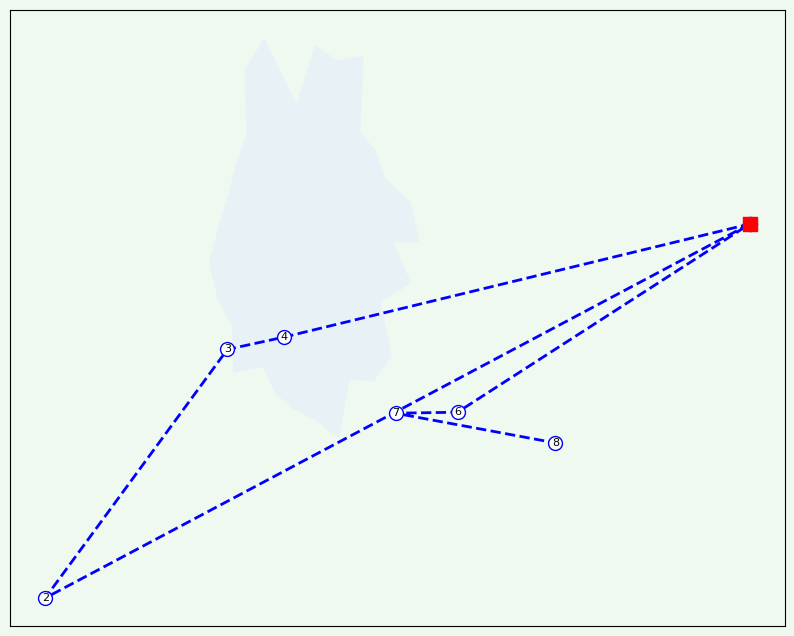

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def create_route_visualization(lat_seq, lon_seq, color='blue', save_path=None):
    # Create figure with light green background
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    ax.set_facecolor('#f0f9f0')
    plt.gcf().set_facecolor('#f0f9f0')

    # Create grid pattern
    ax.grid(True, linestyle=':', color='#e5e7eb', alpha=0.6)

    # Plot route
    plt.plot(lon_seq, lat_seq, color=color, linewidth=2, linestyle='--')

    # Plot points
    plt.scatter(lon_seq, lat_seq, c='white', edgecolor=color, s=100, zorder=5)

    # Add numbers to points
    for i, (lon, lat) in enumerate(zip(lon_seq, lat_seq)):
        plt.annotate(str(i+1), (lon, lat), xytext=(0, 0),
                    textcoords='offset points', ha='center', va='center',
                    color='black', fontsize=8, zorder=6)

    # Plot depot (first point) as a square
    plt.scatter([lon_seq[0]], [lat_seq[0]], c='red', marker='s', s=100, zorder=7)

    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])

    # Add some decorative "lakes"
    def create_random_lake(x, y, size):
        theta = np.linspace(0, 2*np.pi, 30)
        r = size * (0.5 + 0.3*np.random.rand(30))
        lake_x = x + r*np.cos(theta)
        lake_y = y + r*np.sin(theta)
        return plt.fill(lake_x, lake_y, '#e6f0f9', alpha=0.7)

    # Add a few random lakes
    np.random.seed(42)  # For reproducibility
    for _ in range(1):
        create_random_lake(
            np.random.uniform(min(lon_seq), max(lon_seq)),
            np.random.uniform(min(lat_seq), max(lat_seq)),
            0.1
        )

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

    # Create visualization for a single route
def draw_planned_route(row_id):
    lats = final_routes["current_lat"].iloc[row_id]
    lngs = final_routes["current_lng"].iloc[row_id]
    create_route_visualization(lats, lngs, color='blue', save_path=f'planned_route_{row_id}.png')

# Usage
id = 13
draw_planned_route(id)

# Benchmarks

### HA

In [37]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, log_loss, brier_score_loss
)
from sklearn.metrics import confusion_matrix

def get_predictions(df, scores_dict):
    def predict(row):
        label = scores_dict.get((row['driver_id_sorted'], row['day_of_week']))
        if label is None:
            return 0.5
        else:
            return label
    return df.apply(predict, axis=1)

def calculate_metrics(y_true, y_pred, y_pred_proba):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    average_precision = average_precision_score(y_true, y_pred)
    quadratic_loss = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    metrics = {
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "average_precision": average_precision,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score,
        "true_positive": tp,
        "false_positive": fp,
        "true_negative": tn,
        "false_negative": fn
    }
    return metrics

# Split dataset by group based on driverID and feature
def split_group(group):
    n = len(group)
    if n < 4:  # Ensure at least 1 sample for train and 1 each for val and test
        return pd.DataFrame()

    # Calculate sizes for each split
    train_size = max(int(n * 0.8), n - 4)  # Ensure at least 2 samples total for val and test
    val_test_size = n - train_size

    # Always give the extra sample to val when odd
    val_size = (val_test_size + 1) // 2  # This will be larger when val_test_size is odd
    test_size = val_test_size - val_size

    return pd.concat([
        group.iloc[:train_size].assign(split='train'),
        group.iloc[train_size:train_size+val_size].assign(split='val'),
        group.iloc[train_size+val_size:].assign(split='test')
    ])

def categorize_predictions(df, y_true, y_pred, y_pred_proba):
    df = df.copy()
    df['prediction_category'] = 'Unknown'
    df.loc[(y_true == 1) & (y_pred == 1), 'prediction_category'] = 'True Positive'
    df.loc[(y_true == 0) & (y_pred == 1), 'prediction_category'] = 'False Positive'
    df.loc[(y_true == 1) & (y_pred == 0), 'prediction_category'] = 'False Negative'
    df.loc[(y_true == 0) & (y_pred == 0), 'prediction_category'] = 'True Negative'
    df['predictive_probability'] = y_pred_proba
    return df

def save_categorized_routes(df, filename):
    df.to_csv(filename, index=False)
    print(f"Saved categorized routes to {filename}")


final_routes_split = final_routes.groupby(['driver_id_sorted', 'day_of_week']).apply(split_group).reset_index(drop=True)

# Separate into train, validation, and test sets

#First encoding drivers and locations one more time (as we removed some routes here)
drivers_dic = {}
locations_dic = {}
location_count = {}
k = 1
for driver in final_routes_split['driver_id_sorted']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes_split['driver_id_sorted']:
    encoding_drivers.append(drivers_dic[driver])
final_routes_split['driver_id_sorted'] = encoding_drivers

k = 1
for row in final_routes_split['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1
k = 1
print('Number of drivers ', len(locations_dic))
encoding_routes = []
for row in final_routes_split['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes_split['routes'] = encoding_routes

print(len(final_routes_split))
train_df = final_routes_split[final_routes_split['split'] == 'train'].drop('split', axis=1)
val_df = final_routes_split[final_routes_split['split'] == 'val'].drop('split', axis=1)
test_df = final_routes_split[final_routes_split['split'] == 'test'].drop('split', axis=1)

print('Length of subsets', len(train_df), len(val_df), len(test_df))
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
combined_df = combined_df.reset_index(drop=True)

val_y_true = val_df['label']
average_scores_dict = train_df.groupby(['driver_id_sorted', 'day_of_week'])['score_cumulative_avg'].last().to_dict()
average_scores_dict_driver = train_df.groupby(['driver_id_sorted'])['score_cumulative_driver'].last().to_dict()
val_y_pred_proba = get_predictions(val_df, average_scores_dict)
val_y_pred = (val_y_pred_proba.values > 0.5).astype(int)
val_metrics = calculate_metrics(val_y_true, val_y_pred, val_y_pred_proba)

# # # Calculate metrics for test set
test_y_true = test_df['label']
test_y_pred_proba = get_predictions(test_df, average_scores_dict)
test_y_pred = (test_y_pred_proba.values > 0.5).astype(int)
test_metrics = calculate_metrics(test_y_true, test_y_pred, test_y_pred_proba)

print('Val metrics', val_metrics)
print('Test metrics', test_metrics)

test_df_group_HA = categorize_predictions(test_df, test_y_true, test_y_pred, test_y_pred_proba)
test_df_group_HA[test_df_group_HA['prediction_category'] == 'True Positive']['routes']
print(len(test_df_group_HA[test_df_group_HA['prediction_category'] == 'True Positive']['routes']), len(test_df_group_HA[test_df_group_HA['prediction_category'] == 'False Positive']['routes']))

/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_30268/1649469844.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_routes_split = final_routes.groupby(['driver_id_sorted', 'day_of_week']).apply(split_group).reset_index(drop=True)


Total number of drivers 316
Number of drivers  10538
17354
Len of subsets 13555 2167 1632
Val metrics {'acc': 0.7120443008767882, 'precision': 0.7050173010380623, 'recall': 0.7422586520947176, 'f1': 0.7231588287488908, 'roc_auc': 0.7116344710426815, 'average_precision': 0.6539004846038091, 'quadratic_loss': 1.4464116127361257, 'brier_score': 0.1977593627904236, 'true_positive': 815, 'false_positive': 341, 'true_negative': 728, 'false_negative': 283}
Test metrics {'acc': 0.7113970588235294, 'precision': 0.7180974477958236, 'recall': 0.730814639905549, 'f1': 0.724400234055003, 'roc_auc': 0.7106302498890803, 'average_precision': 0.6645020100809398, 'quadratic_loss': 1.2855107612775662, 'brier_score': 0.19738926020050643, 'true_positive': 619, 'false_positive': 243, 'true_negative': 542, 'false_negative': 228}
619 243


### RF

In [38]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prepare the data
rf_df = final_routes_split[['driver_id_sorted', 'day_of_week_encoded', 'label', 'split', 'routes']]
o_day_of = pd.get_dummies(rf_df['day_of_week_encoded'], prefix='day')
o_driver = pd.get_dummies(rf_df['driver_id_sorted'], prefix='driver')
rf_df = pd.concat([o_day_of, o_driver, rf_df['split'], rf_df['label'], rf_df['routes']], axis=1)


for col in rf_df.columns:
    if col != 'split' and col != 'label' and col != 'routes':
        rf_df[col] = rf_df[col].astype(int)

train_df = rf_df[rf_df['split'] == 'train'].drop('split', axis=1)
val_df = rf_df[rf_df['split'] == 'val'].drop('split', axis=1)
test_df = rf_df[rf_df['split'] == 'test'].drop('split', axis=1)

# Create X_train and y_train
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_val = val_df.drop('label', axis=1)
y_val = val_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']
print('Length', len(train_df), len(val_df), len(test_df))

# Train the model
model = RandomForestRegressor(random_state=42)
X_trainwr = X_train.drop('routes', axis=1)
model.fit(X_trainwr, y_train)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_pred_proba):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    average_precision = average_precision_score(y_true, y_pred)
    quadratic_loss = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    metrics = {
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "average_precision": average_precision,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score,
        "true_positive": tp,
        "false_positive": fp,
        "true_negative": tn,
        "false_negative": fn
    }
    return metrics

# Evaluate on validation set
y_val_pred_proba = model.predict(X_val.drop('routes', axis=1))
y_val_pred = (y_val_pred_proba > 0.5).astype(int)
val_metrics = calculate_metrics(y_val, y_val_pred, y_val_pred_proba)

y_test_pred_proba = model.predict(X_test.drop('routes', axis=1))
y_test_pred = (y_test_pred_proba > 0.5).astype(int)
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_proba)

print('Val metrics', val_metrics)
print('Test metrics', test_metrics)

test_df_group_RF = categorize_predictions(test_df, y_test, y_test_pred, y_test_pred_proba)
test_df_group_RF
test_df

Length 13555 2167 1632
Val metrics {'acc': 0.7138901707429626, 'precision': 0.6985049833887044, 'recall': 0.7659380692167578, 'f1': 0.7306689834926151, 'roc_auc': 0.7131841889582387, 'average_precision': 0.6536086972167351, 'quadratic_loss': 1.1689872210225964, 'brier_score': 0.19754588967247302, 'true_positive': 841, 'false_positive': 363, 'true_negative': 706, 'false_negative': 257}
Test metrics {'acc': 0.7107843137254902, 'precision': 0.7094972067039106, 'recall': 0.7497048406139315, 'f1': 0.7290470723306545, 'roc_auc': 0.7092473247655645, 'average_precision': 0.6618154510522986, 'quadratic_loss': 1.1513678199109216, 'brier_score': 0.19719431395307205, 'true_positive': 635, 'false_positive': 260, 'true_negative': 525, 'false_negative': 212}


,day_1.0,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0,driver_1,driver_2,driver_3,...,driver_309,driver_310,driver_311,driver_312,driver_313,driver_314,driver_315,driver_316,label,routes
18,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,"[1, 16, 4, 5, 5, 9, 7, 6, 3, 8]"
19,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,"[1, 16, 9, 5, 5, 4, 8, 6, 7]"
36,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,"[1, 4, 3, 16, 9, 15, 5, 5, 6, 7]"
37,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,"[1, 15, 9, 16, 14, 3, 8, 4, 5, 5, 6, 7]"
55,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,"[1, 1, 16, 9, 4, 8, 3, 14, 5, 5, 6, 7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17315,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.0,"[8649, 9199, 9200, 9201, 9205, 9204, 9202, 920..."
17322,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.0,"[8649, 9199, 9202, 9203, 9224, 9229, 9204, 920..."
17333,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.0,"[8649, 9205, 9206, 9204, 9202, 9229, 9224, 920..."
17344,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1.0,"[8649, 9199, 9205, 9202, 9202, 9203, 9224, 921..."


### NN benchmark

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
torch.use_deterministic_algorithms(True)

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.drop('routes', axis=1).values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.drop('routes', axis=1).values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.drop('routes', axis=1).values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Training settings
num_epochs = 100
learning_rate = 0.001

model = SimpleNN(X_train.shape[1]-1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation loop
best_val_loss = float('inf')
best_model = None

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model.state_dict()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Load the best model
model.load_state_dict(best_model)

# Evaluation on test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_true = y_test_tensor

y_pred = y_pred.numpy()
y_true = y_true.numpy()

y_test_pred = (y_pred > 0.5).astype(int)
test_metrics = calculate_metrics(y_test, y_test_pred, y_pred)

print(test_metrics)

y_pred = y_pred.flatten()
y_test_pred = y_test_pred.flatten()

test_df_group_NN = categorize_predictions(X_test, y_test, y_test_pred, y_pred)
test_df_group_NN

Epoch [10/100], Train Loss: 0.6825, Val Loss: 0.6863
Epoch [20/100], Train Loss: 0.6674, Val Loss: 0.6770
Epoch [30/100], Train Loss: 0.6460, Val Loss: 0.6623
Epoch [40/100], Train Loss: 0.6180, Val Loss: 0.6403
Epoch [50/100], Train Loss: 0.5859, Val Loss: 0.6138
Epoch [60/100], Train Loss: 0.5557, Val Loss: 0.5910
Epoch [70/100], Train Loss: 0.5319, Val Loss: 0.5759
Epoch [80/100], Train Loss: 0.5156, Val Loss: 0.5668
Epoch [90/100], Train Loss: 0.5052, Val Loss: 0.5624
Epoch [100/100], Train Loss: 0.4985, Val Loss: 0.5599
{'acc': 0.7126225490196079, 'precision': 0.702355460385439, 'recall': 0.7744982290436836, 'f1': 0.7366647950589557, 'roc_auc': 0.7101790508275743, 'average_precision': 0.6610073739531738, 'quadratic_loss': 0.5608609459954689, 'brier_score': 0.18938443268368035, 'true_positive': 656, 'false_positive': 278, 'true_negative': 507, 'false_negative': 191}


,day_1.0,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0,driver_1,driver_2,driver_3,...,driver_310,driver_311,driver_312,driver_313,driver_314,driver_315,driver_316,routes,prediction_category,predictive_probability
18,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,"[1, 16, 4, 5, 5, 9, 7, 6, 3, 8]",True Positive,0.707794
19,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,"[1, 16, 9, 5, 5, 4, 8, 6, 7]",False Positive,0.707794
36,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,"[1, 4, 3, 16, 9, 15, 5, 5, 6, 7]",True Positive,0.722560
37,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,"[1, 15, 9, 16, 14, 3, 8, 4, 5, 5, 6, 7]",True Positive,0.722560
55,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,"[1, 1, 16, 9, 4, 8, 3, 14, 5, 5, 6, 7]",True Positive,0.702217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17315,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,"[8649, 9199, 9200, 9201, 9205, 9204, 9202, 920...",True Positive,0.896531
17322,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,"[8649, 9199, 9202, 9203, 9224, 9229, 9204, 920...",True Positive,0.899370
17333,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,"[8649, 9205, 9206, 9204, 9202, 9229, 9224, 920...",True Positive,0.896052
17344,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,"[8649, 9199, 9205, 9202, 9202, 9203, 9224, 921...",True Positive,0.899539


# Models (First preprocessing, then different architectures and then training with CNN)

In [50]:
def padding_(routes, route_len):
    features = np.zeros((len(routes), route_len),dtype=np.float16)
    for ii, route in enumerate(routes):
        if len(route) != 0:
            features[ii, -len(route):] = np.array(route)[:route_len]
    return features

X = final_routes_split.drop(columns = ['driver_id', 'len', 'driver_id_sorted','day_of_week_encoded'])
max_route_length = max(len(item) for item in final_routes_split['routes'])
y = np.array(final_routes_split['label'])
final_routes_split

,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,date,location_is_depot,...,day_of_week_encoded,experience_feature,len_feature,driver_id_feature,country_flag_feature,day_of_week_feature,day_of_week_encoded_ext,score_cumulative_avg,score_cumulative_driver,split
0,"[1, 2, 3, 4, 5, 5, 6, 7]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255.0,"[14.640018023192697, 1.5229312527257717, 0.606...",8.0,"[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",Monday,2024-01-15,"[1, 0, 0, 0, 0, 0, 0, 0]",...,2.0,"[8, 8, 8, 8, 8, 8, 8, 8]","[8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.000000,0.000000,train
1,"[1, 2, 3, 8, 4, 5, 5, 6, 7]","[1167, 1405, 1577, 1560, 1413, 1391, 1391, 143...",1255.0,"[14.640018023192697, 1.5229312527257717, 0.185...",11.0,"[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",Monday,2024-02-19,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",...,2.0,"[11, 11, 11, 11, 11, 11, 11, 11, 11]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.000000,0.166667,train
2,"[1, 2, 3, 4, 5, 5, 7, 6, 8]","[1167, 1405, 1560, 1391, 1391, 1269, 1577, 143...",1255.0,"[14.640018023192697, 1.5229312527257717, 0.606...",11.0,"[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",Monday,2024-02-26,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",...,2.0,"[11, 11, 11, 11, 11, 11, 11, 11, 11]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.333333,0.235294,train
3,"[1, 2, 3, 8, 4, 5, 6, 9, 7]","[1167, 1405, 1168, 1560, 1577, 1413, 1391, 126...",1255.0,"[14.640018023192697, 1.5229312527257717, 0.185...",10.0,"[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",Monday,2024-03-04,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",...,2.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.500000,0.318182,train
4,"[1, 2, 3, 4, 5, 5, 6, 9, 7]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 126...",1255.0,"[14.640018023192697, 1.5229312527257717, 0.606...",10.0,"[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",Monday,2024-03-11,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",...,2.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.400000,0.370370,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17349,"[8649, 9201, 9200, 9205, 9206, 9204, 9211, 920...","[3162, 3636, 3660, 3649, 3649, 3661, 3596, 364...",1555.0,"[10.326988859283256, 0.016889370846510543, 0.2...",11.0,"[56.0667627, 56.1577259, 56.1578712, 56.159131...","[9.986944, 10.1987529, 10.1991044, 10.204122, ...",Wednesday,2024-06-05,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,7.0,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...","[387, 387, 387, 387, 387, 387, 387, 387, 387, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 0, 0, 0, 0, 0, 1]",1.000000,1.000000,train
17350,"[8649, 9199, 9202, 9209, 9203, 9210, 9211, 920...","[3162, 3654, 3656, 3636, 3648, 3661, 3652, 364...",1555.0,"[10.35361799875347, 0.40596031876087574, 0.123...",12.0,"[56.0667627, 56.158392, 56.1596286, 56.1578408...","[9.986944, 10.198705, 10.2089833, 10.2090195, 

In [51]:
from torch.utils.data import Dataset, DataLoader
import torch
import random
import os
import torch.nn as nn

seed_value = 42
device = "cpu"
g = torch.Generator()

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Additional steps if using DataLoaders (to ensure reproducibility in data loading)
torch.use_deterministic_algorithms(True)

def reset_random():
    g.manual_seed(seed_value)
    torch.manual_seed(seed_value)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'
    torch.use_deterministic_algorithms(True)

set_seed(42)

### RNN model

In [64]:
class PredictionRNN(nn.Module):
    def __init__(self,no_layers,vocab_size, vocab_size_driv, vocab_size_len,hidden_dim,embedding_dim,embedding_dim_driv, output_dim,additional_feature_count,drop_prob=0.5):
        super(PredictionRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv
        self.vocab_size_len = vocab_size_len

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc_static_1 = nn.Linear(embedding_dim_driv+9, 128)
        self.fc = nn.Linear(64,64)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self,x, is_training=True):
        batch_size = len(x['routes'])
        route_ids = x['routes'].int()

        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        # get driver ids example
        driver_ids = x['driver_id_sorted'].int()
        len_feature = x['len'].int()
        # distance = x['distance_route'].int()
        day_of_week_feature = x['day_of_week_encoded_ext'].int()
        country_flag = x['country_flag'].int()

        embedding_driv = self.embedding_driv(driver_ids)
        all_embeds = embeds
        all_static = torch.concatenate((embedding_driv, day_of_week_feature, country_flag.view(batch_size, 1), len_feature.view(batch_size, 1)), dim=1)
        lstm_out, _ = self.lstm(all_embeds)
        lstm_out = lstm_out.contiguous().view(batch_size, max_route_length, self.hidden_dim)
        out = self.dropout(lstm_out)
        out_static = self.relu(self.fc_static_1(all_static))
        out = self.fc(out)
        out = self.layer3(out)
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        # print(sig_out.shape)
        return sig_out

### CNN model

In [65]:
class PredictionAllFeaturesCNN(nn.Module):
    def __init__(self, no_layers, vocab_size, vocab_size_driv, embedding_dim, embedding_dim_driv, output_dim, drop_prob=0.5):
        super(PredictionAllFeaturesCNN, self).__init__()

        self.no_layers = no_layers
        self.output_dim = output_dim
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv

        # Embedding layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)

        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=embedding_dim, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(drop_prob)
        self.fc_static_1 = nn.Linear(embedding_dim_driv+9, 128)
        self.fc = nn.Linear(128+64,64)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self, x, is_training=True):
        batch_size = len(x['routes'])
        route_ids = x['routes'].int()

        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        # get driver ids example
        driver_ids = x['driver_id_sorted'].int()
        len_feature = x['len'].int()
        day_of_week_feature = x['day_of_week_encoded_ext'].int()
        country_flag = x['country_flag'].int()

        embedding_driv = self.embedding_driv(driver_ids)
        all_static = torch.concatenate((embedding_driv, country_flag.view(batch_size, 1),len_feature.view(batch_size, 1), day_of_week_feature), dim=1)
        cnn_input = embeds.permute(0, 2, 1)  # Reshape for CNN: B x Feature x S
        cnn_out = self.conv1(cnn_input)
        cnn_out = self.relu(cnn_out)
        cnn_out = self.pool(cnn_out)
        cnn_out = torch.mean(cnn_out, dim=2)
        cnn_out = self.dropout(cnn_out)
        out_static = self.relu(self.fc_static_1(all_static))
        combined = self.fc(torch.cat((cnn_out, out_static), dim=1))
        x = self.relu(combined)
        out = self.layer3(x)
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        return sig_out

### Attention based model

In [66]:
import math
class RunningNorm:
    def __init__(self, dim=0):
        self.dim = dim
        self.n = 0
        self.mean = 0
        self.var = 0

    def update(self, x):
        self.n += 1
        if self.n == 1:
            self.mean = x
            self.var = torch.zeros_like(x)
        else:
            new_mean = self.mean + (x - self.mean) / self.n
            self.var = (self.var * (self.n - 1) + (x - self.mean) * (x - new_mean)) / self.n
            self.mean = new_mean

    def normalize(self, x):
        if self.n == 0:
            return x
        return (x - self.mean) / (torch.sqrt(self.var) + 1e-8)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=35):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x.shape should be (batch_size, sequence_length, d_model)
        sequence_length = x.size(1)
        x = x + self.pe[:, :sequence_length, :]
        return x

class SinusoidalPosEmb(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, x):
        device = x.device
        half_dim = self.dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=device) * -emb)
        emb = x[:, None] * emb[None, :]
        emb = torch.cat((emb.sin(), emb.cos()), dim=-1)
        return emb


# "Encoder-Only" Style Transformer
class NanoTransformer(nn.Module):
    """
    This class implements a simplified Transformer model for sequence classification.
    It uses an embedding layer for tokens, sinusoidal positional embeddings,
    a single Transformer block, and a final linear layer for prediction.

    Args:
      num_emb: The number of unique tokens in the vocabulary.
      output_size: The size of the output layer (number of classes).
      hidden_size: The dimension of the hidden layer in the Transformer block (default: 128).
      num_heads: The number of heads in the multi-head attention layer (default: 4).
    """
    def __init__(self, embedding_dim, vocab_size, embedding_dim_driv, vocab_size_driv, hidden_size=64, num_heads=4):
        super(NanoTransformer, self).__init__()

        # Create an embedding for each token
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)
        self.embedding.weight.data = 0.001 * self.embedding.weight.data

        self.hidden_size = hidden_size
        self.embedding_dim_driv = embedding_dim_driv
        self.vocab_size_driv = vocab_size_driv

        self.pos_emb = SinusoidalPosEmb(hidden_size)

        self.multihead_attn1 = nn.MultiheadAttention(hidden_size, num_heads=num_heads, batch_first=True)
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.fc_static_1 = nn.Linear(embedding_dim_driv+9, 128)
        self.layer3 = nn.Linear(128, 1)
        self.fc = nn.Linear(hidden_size+128, 64)
        self.layer3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()



    def forward(self, x, is_training=True):
        bs = len(x['routes'])
        l = len(x['routes'][0])
        route_ids = x['routes'].int()
        input_embs = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        driver_ids = x['driver_id_sorted'].int()
        experience = x['last_two_weeks_count'].float()
        len_feature = x['len'].float()
        day_of_week_feature = x['day_of_week_encoded_ext'].int()
        country_flag = x['country_flag'].int()

        embedding_driv = self.embedding_driv(driver_ids)

        all_static = torch.cat((embedding_driv, country_flag.view(bs, 1),
                                len_feature.view(bs, 1), day_of_week_feature), dim=1)


        seq_indx = torch.arange(l)
        pos_emb = self.pos_emb(seq_indx).reshape(1, l, -1).expand(bs, l, -1)
        embs = input_embs + pos_emb
        output1, attn_map1 = self.multihead_attn1(embs, embs, embs)
        output = self.layer_norm(embs + output1)

        out_static = self.relu(self.fc_static_1(all_static))
        out_static = out_static.unsqueeze(1).expand(-1, l, -1)

        out = self.fc(torch.cat((output, out_static), dim=2))
        out = self.layer3(out)
        sig_out = self.sig(out).squeeze(-1)
        final_out = torch.mean(sig_out, dim=1)
        return final_out

In [79]:
def get_model():
    no_layers = 2
    vocab_size = 10539 #extra 1 for padding
    vocab_size_driv = 317
    vocab_size_len = 37 #extra 1 for padding
    embedding_dim = 64 #was 64
    embedding_dim_driv = 32 #was 64
    # embedding_dim_len = 2 #was 64
    output_dim = 1
    hidden_dim = 64 #was 64

## CHANGE MODEL HERE
    model = PredictionAllFeaturesCNN(no_layers, vocab_size, vocab_size_driv, embedding_dim, embedding_dim_driv, output_dim, drop_prob=0.5)
    # model = PredictionRNN(no_layers,vocab_size, vocab_size_driv, vocab_size_len, hidden_dim,embedding_dim, embedding_dim_driv, output_dim,len(drivers_dic),drop_prob=0.5)
    # model = NanoTransformer(embedding_dim, vocab_size, embedding_dim_driv, vocab_size_driv)
    model.train()
    print(model)
    return model

In [69]:
RUN_NAME = 'run_name'
def train_model(data, model, epochs = 20):
    train_loader, valid_loader = data
    lr=0.001

    criterion = nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    clip = 5
    valid_loss_min = np.Inf
    # train for some number of epochs
    epoch_tr_loss,epoch_vl_loss = [],[]

    for epoch in range(epochs):
        train_losses = []
        train_rmse = 0.0
        model.train()
        for inputs, labels in train_loader:
            # print(labels)

            model.zero_grad()
            output = model(inputs)
            loss = criterion(output.view(-1), labels.float())
            loss.backward()
            train_losses.append(loss.item())
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
        val_losses = []
        model.eval()
        with torch.no_grad():  # Disable gradient computation for validation
            for inputs, labels in valid_loader:
                output = model(inputs, is_training=False)  # Set is_training to False for validation
                val_loss = criterion(output.view(-1), labels.float())
                val_losses.append(val_loss.item())

        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)

        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')

        if epoch_val_loss <= valid_loss_min:
            torch.save(model.state_dict(), f'{RUN_NAME}.pt')
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
            valid_loss_min = epoch_val_loss
        print(25*'==')

In [70]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, log_loss, brier_score_loss, confusion_matrix
)
import matplotlib.pyplot as plt

def get_stats(model, data):
    model.eval()
    y_pred = []
    y = []
    all_routes = []
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in data:
            y.extend(labels)
            results = model(inputs, is_training=False).detach()  # Set is_training to False
            y_pred.extend(results)
            all_routes.extend(inputs['routes'].cpu().numpy())

    y_true = np.array(y)
    y_pred_proba = np.array(y_pred)
    y_pred = (y_pred_proba > 0.5).astype(np.float32)

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    average_precision = average_precision_score(y_true, y_pred)
    quadratic_loss = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "average_precision": average_precision,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score,
        "true_positive": tp,
        "false_positive": fp,
        "true_negative": tn,
        "false_negative": fn
    }


In [71]:
def get_stats(model, data):
    model.eval()
    y_pred = []
    y = []
    all_inputs = []
    with torch.no_grad():
        for inputs, labels in data:
            y.extend(labels.cpu().numpy())
            results = model(inputs, is_training=False).detach()
            y_pred.extend(results.cpu().numpy())
            all_inputs.append({k: v.cpu().numpy() for k, v in inputs.items()})

    y_true = np.array(y)
    y_pred_proba = np.array(y_pred)
    y_pred_binary = (y_pred_proba > 0.5).astype(np.float32)

    # Calculate metrics
    acc = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    average_precision = average_precision_score(y_true, y_pred_proba)
    quadratic_loss = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()

    # Combine all inputs into a single dictionary
    combined_inputs = {k: np.concatenate([d[k] for d in all_inputs]) for k in all_inputs[0].keys()}

    return {
        "metrics": {
            "acc": acc,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "roc_auc": roc_auc,
            "average_precision": average_precision,
            "quadratic_loss": quadratic_loss,
            "brier_score": brier_score,
            "true_positive": tp,
            "false_positive": fp,
            "true_negative": tn,
            "false_negative": fn
        },
        "predictions": {
            "y_true": y_true,
            "y_pred_proba": y_pred_proba,
            "y_pred_binary": y_pred_binary,
            "inputs": combined_inputs
        }
    }

def categorize_predictions(df, stats):
    y_true = stats['predictions']['y_true']
    y_pred_binary = stats['predictions']['y_pred_binary']
    y_pred_proba = stats['predictions']['y_pred_proba']

    df = df.copy()
    df['prediction_category'] = 'Unknown'
    df.loc[(y_true == 1) & (y_pred_binary == 1), 'prediction_category'] = 'True Positive'
    df.loc[(y_true == 0) & (y_pred_binary == 1), 'prediction_category'] = 'False Positive'
    df.loc[(y_true == 1) & (y_pred_binary == 0), 'prediction_category'] = 'False Negative'
    df.loc[(y_true == 0) & (y_pred_binary == 0), 'prediction_category'] = 'True Negative'
    df['predictive_probability'] = y_pred_proba

    # Add other features from the inputs if needed
    for feature, values in stats['predictions']['inputs'].items():
        if feature not in df.columns:
            df[feature] = values

    return df

In [150]:
from sklearn.model_selection import KFold, cross_val_score
set_seed(42)

FEATURE_COLUMNS = ['routes', 'driver_id_feature', 'driver_id_sorted','last_two_weeks_count', 'len', 'day_of_week_feature', 'day_of_week_encoded_ext', 'country_flag', 'location_is_depot', 'location_type_id']


class DataFrameDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = {}
        for col in FEATURE_COLUMNS:
            feature = self.df[col].iloc[idx]
            if isinstance(feature, list):
                feature = padding_([feature], max_route_length)[0]
            item[col] = feature
        item['label'] = self.df['label'].iloc[idx]
        return item, item['label']

def get_data_loaders(train_df, val_df, test_df):
    # create Tensor datasets
    train_data = DataFrameDataset(train_df)
    val_data = DataFrameDataset(val_df)
    test_data = DataFrameDataset(test_df)

    # dataloaders
    batch_size = 2048

    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_size, num_workers=0, generator=g, worker_init_fn=seed_worker)
    val_loader = DataLoader(val_data, shuffle=False, batch_size=batch_size, num_workers=0, generator=g, worker_init_fn=seed_worker)
    test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size,num_workers=0, generator=g, worker_init_fn=seed_worker)
    return train_loader, val_loader, test_loader

train_df = final_routes_split[final_routes_split['split'] == 'train'].drop('split', axis=1)
val_df = final_routes_split[final_routes_split['split'] == 'val'].drop('split', axis=1)
print((val_df['label'] == 1).sum(), (val_df['label'] == 0).sum())
print((test_df['label'] == 1).sum(), (test_df['label'] == 0).sum())
print((train_df['label'] == 1).sum(), (train_df['label'] == 0).sum())
test_df = final_routes_split[final_routes_split['split'] == 'test'].drop('split', axis=1)

print(f'len(train_df) = {len(train_df)}, len(val_df) = {len(val_df)}, len(test_df) = {len(test_df)}')

train_loader, val_loader, test_loader = get_data_loaders(train_df, val_df, test_df)
model = get_model()
model.train()

# Train the model
train_model((train_loader, val_loader), model, epochs=40)

# Load the best model
model = get_model()
model.load_state_dict(torch.load(f'{RUN_NAME}.pt'))

# Evaluate on test set
model.eval()
test_stats = get_stats(model, test_loader)

print("Metrics:", test_stats['metrics'])

categorized_df = categorize_predictions(test_df, test_stats)

1098 1069
847 785
7498 6057
len(train_df) = 13555, len(val_df) = 2167, len(test_df) = 1632
PredictionAllFeaturesCNN(
  (embedding): Embedding(10539, 64)
  (embedding_driv): Embedding(317, 32)
  (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=41, out_features=128, bias=True)
  (fc): Linear(in_features=192, out_features=64, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)


KeyboardInterrupt: 

## Example of inference

In [77]:
model_path = 'run_name.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = get_model()  # Initialize model architecture
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

def predict_single_sample(model, input_data, device='cpu'):
    """
    Make prediction for a single sample
    """
    model.eval()  # Set model to evaluation mode

    # Convert input data to tensors
    input_tensors = {
        'routes': torch.tensor([input_data['routes']]).to(device),
        'driver_id_sorted': torch.tensor([input_data['driver_id_sorted']]).to(device),
        'last_two_weeks_count': torch.tensor([input_data['last_two_weeks_count']]).to(device),
        'len': torch.tensor([input_data['len']]).to(device),
        'day_of_week_encoded_ext': torch.tensor([input_data['day_of_week_encoded_ext']]).to(device),
        'country_flag': torch.tensor([input_data['country_flag']]).to(device),
    }

    with torch.no_grad():  # No need to track gradients during inference
        output = model(input_tensors, is_training=False)
        probability = output.item()
        prediction = 1 if probability >= 0.5 else 0

    return {'probability': probability, 'prediction': prediction}

# 2. Prepare sample data
route = [1, 2, 3, 4]
encoding_route = []
for location in route:
    encoding_route.append(locations_dic[location])
sample_data = {
    'routes': encoding_route,  # Your route sequence
    'driver_id_sorted': drivers_dic[5],  # Driver ID
    'last_two_weeks_count': 10,  # Experience count
    'len': 3,  # Length feature
    'day_of_week_encoded_ext': [1, 0, 0, 0, 0, 0, 0],  # One-hot encoded day
    'country_flag': 1,  # Country flag
}

# 3. Make prediction
result = predict_single_sample(model, sample_data, device)
print(f"Probability: {result['probability']:.4f}")
print(f"Prediction: {result['prediction']}")



PredictionAllFeaturesCNN(
  (embedding): Embedding(10539, 64)
  (embedding_driv): Embedding(317, 32)
  (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=41, out_features=128, bias=True)
  (fc): Linear(in_features=192, out_features=64, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
Probability: 0.5046
Prediction: 1
